In [174]:
import pandas as pd

In [175]:
df = pd.read_csv('scaler_clustering.csv')
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


# Problem Statement
Scaler has a diverse set of learners coming from different companies, job roles, and experience levels. Understanding these learners individually is difficult and time-consuming.

The problem is to group learners with similar professional backgrounds into meaningful segments based on their job profile, company, and related attributes. These groups should represent learners who share common career characteristics.

By creating these groups, Scaler can gain better insights into learner profiles, identify patterns across companies and roles, and use these insights to improve learning programs, career guidance, and business decisions.

In [176]:
#info of each columns/features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [177]:
#statistical summary
df.describe()

,Unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


In [178]:
#null values
df.isna().sum()

Unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

# Univariate Analysis 

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [181]:
# Unnamed: 0 -- dropping as it is adding any value
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [182]:
df['email_hash'].nunique()

153443

In [183]:
df['email_hash'].value_counts().head()

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
Name: email_hash, dtype: int64

In [184]:
df['email_hash'].isnull().sum()

0

In [185]:
df['company_hash'].nunique()

37299

In [186]:
df['company_hash'].value_counts().head()

nvnv wgzohrnvzwj otqcxwto    8337
xzegojo                      5381
vbvkgz                       3481
zgn vuurxwvmrt vwwghzn       3411
wgszxkvzn                    3240
Name: company_hash, dtype: int64

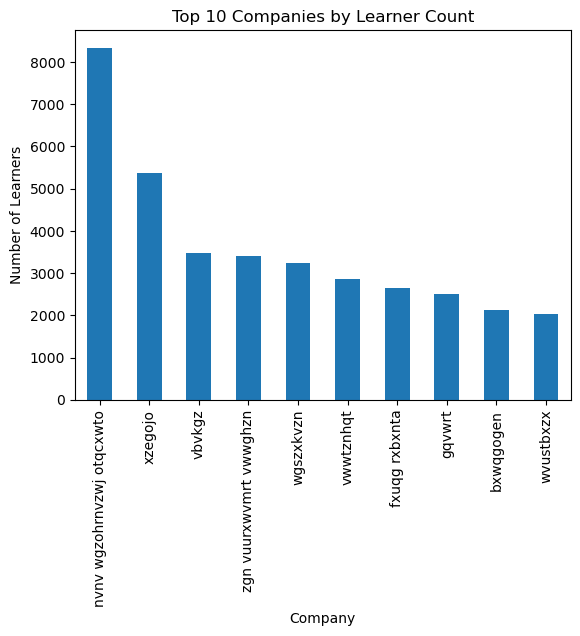

In [187]:
plt.figure()
df['company_hash'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Companies by Learner Count')
plt.xlabel('Company')
plt.ylabel('Number of Learners')
plt.show()


In [188]:
df['orgyear'].describe()

count    205757.000000
mean       2014.882750
std          63.571115
min           0.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max       20165.000000
Name: orgyear, dtype: float64

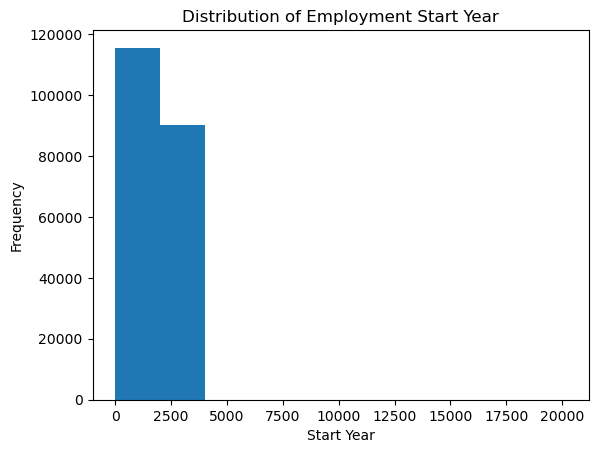

In [189]:
plt.figure()
plt.hist(df['orgyear'].dropna(), bins=10)
plt.title('Distribution of Employment Start Year')
plt.xlabel('Start Year')
plt.ylabel('Frequency')
plt.show()


In [190]:
# here min and max date is not correct
# let's fix these values
# assuming 
valid_min_year = 1970
valid_max_year = 2025

invalid_orgyear = df[(df['orgyear'] < valid_min_year) | (df['orgyear'] > valid_max_year)]

invalid_orgyear['orgyear'].value_counts()

0.0        17
2026.0      9
3.0         6
2031.0      5
2029.0      5
2028.0      4
91.0        3
2.0         3
1.0         2
20165.0     2
6.0         2
5.0         2
208.0       1
201.0       1
1900.0      1
38.0        1
2204.0      1
2101.0      1
2107.0      1
83.0        1
4.0         1
2106.0      1
2027.0      1
209.0       1
206.0       1
200.0       1
Name: orgyear, dtype: int64

In [191]:
#converting the invalid orgyears to NAN values
df.loc[(df['orgyear'] < valid_min_year) | (df['orgyear'] > valid_max_year), 'orgyear'] = np.nan

In [192]:
df['orgyear'].describe()

count    205683.000000
mean       2015.117141
std           4.234453
min        1970.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2025.000000
Name: orgyear, dtype: float64

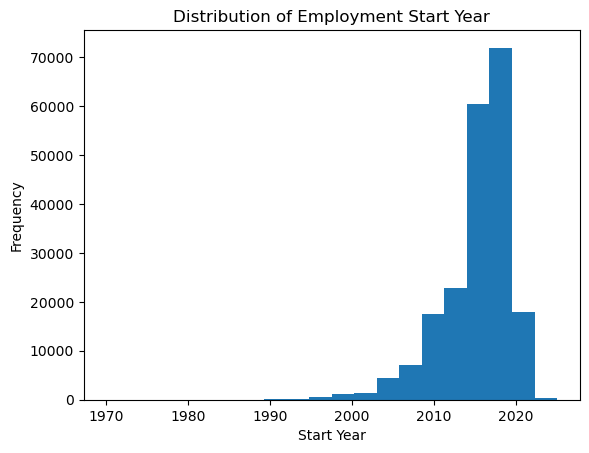

In [193]:
plt.figure()
plt.hist(df['orgyear'].dropna(), bins=20)
plt.title('Distribution of Employment Start Year')
plt.xlabel('Start Year')
plt.ylabel('Frequency')
plt.show()

During univariate analysis, invalid values such as 0 and unrealistically large years (e.g., 20165) were observed in the orgyear column.  
Since orgyear represents the employment start year, values outside a reasonable range were treated as data quality issues and replaced with NaN.


In [194]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [195]:
df['ctc'].describe()

count    2.058430e+05
mean     2.271685e+06
std      1.180091e+07
min      2.000000e+00
25%      5.300000e+05
50%      9.500000e+05
75%      1.700000e+06
max      1.000150e+09
Name: ctc, dtype: float64

In [196]:
df['ctc'].isna().sum()

0

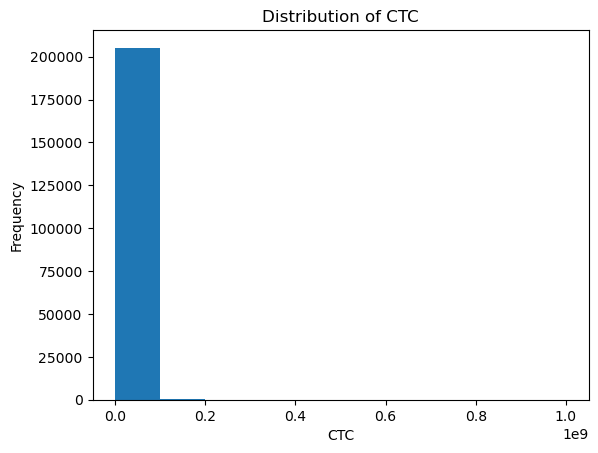

In [197]:
plt.figure()
plt.hist(df['ctc'].dropna())
plt.title('Distribution of CTC')
plt.xlabel('CTC')
plt.ylabel('Frequency')
plt.show()

In [198]:
#here also we are having some messy data where min is 2 and max is 100 cr
#lets fix this 
# assuming 
min_ctc = 50000 # 50 k
max_ctc = 10000000 # 1 crore

invalid_ctc = df[(df['ctc'] < min_ctc) | (df['ctc'] > max_ctc)]
invalid_ctc['ctc'].value_counts()


100000000    534
200000000    378
10000        157
20000        120
40000        108
            ... 
37600000       1
189900000      1
78600000       1
100380000      1
67300000       1
Name: ctc, Length: 729, dtype: int64

In [199]:
df.loc[(df['ctc'] < min_ctc) | (df['ctc'] > max_ctc), 'ctc'] = np.nan

In [200]:
df['ctc'].describe()

count    2.011830e+05
mean     1.302354e+06
std      1.182787e+06
min      5.000000e+04
25%      5.500000e+05
50%      9.500000e+05
75%      1.650000e+06
max      1.000000e+07
Name: ctc, dtype: float64

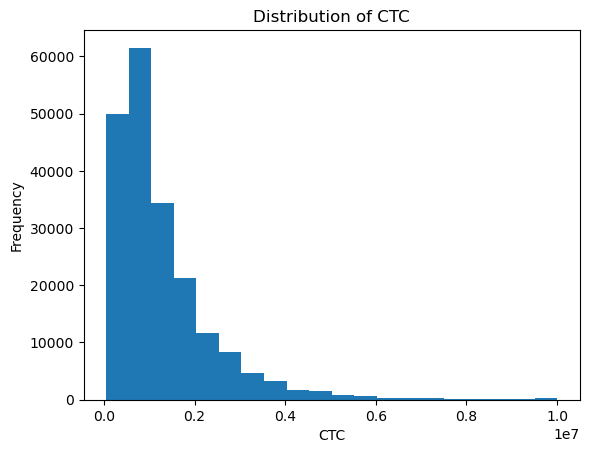

In [201]:
plt.figure()
plt.hist(df['ctc'].dropna(), bins = 20)
plt.title('Distribution of CTC')
plt.xlabel('CTC')
plt.ylabel('Frequency')
plt.show()

In [202]:
#because the data is right skewed we are using log 
df['ctc_log'] = np.log1p(df['ctc'])

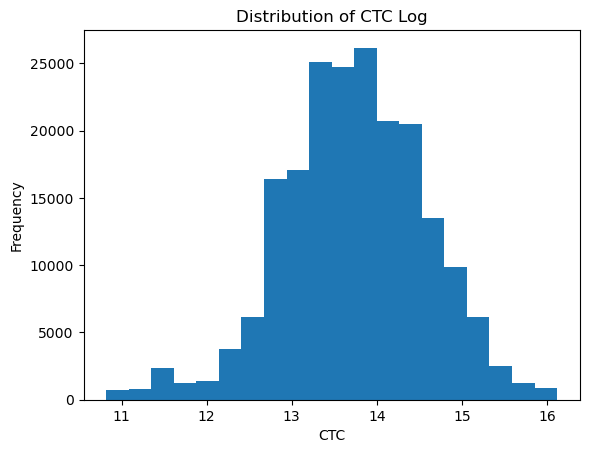

In [203]:
plt.figure()
plt.hist(df['ctc_log'].dropna(), bins = 20)
plt.title('Distribution of CTC Log')
plt.xlabel('CTC')
plt.ylabel('Frequency')
plt.show()

In [204]:
df['job_position'].value_counts()

Backend Engineer                  43554
FullStack Engineer                24717
Other                             18071
Frontend Engineer                 10417
Engineering Leadership             6870
                                  ...  
ayS                                   1
Principal Product Engineer            1
Senior Director of Engineering        1
Seller Support Associate              1
Android Application developer         1
Name: job_position, Length: 1017, dtype: int64

In [205]:
df['job_position'].isna().sum()

52562

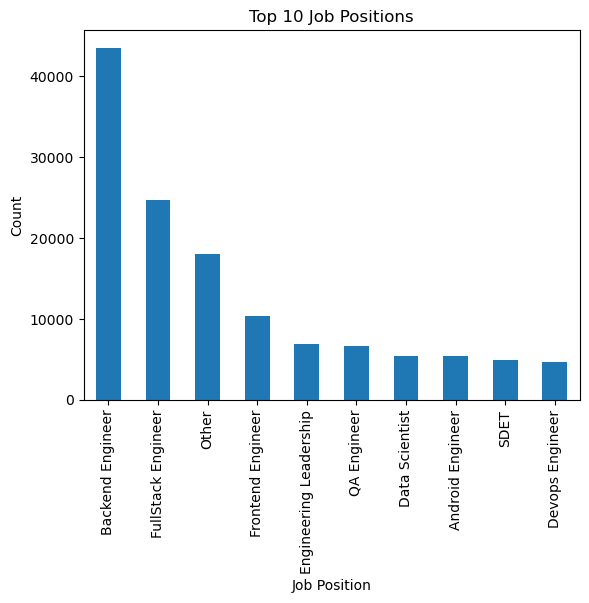

In [206]:
plt.figure()
df['job_position'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Job Positions')
plt.xlabel('Job Position')
plt.ylabel('Count')
plt.show()

In [207]:
df['ctc_updated_year'].describe()

count    205843.000000
mean       2019.628231
std           1.325104
min        2015.000000
25%        2019.000000
50%        2020.000000
75%        2021.000000
max        2021.000000
Name: ctc_updated_year, dtype: float64

In [208]:
df['ctc_updated_year'].isna().sum()

0

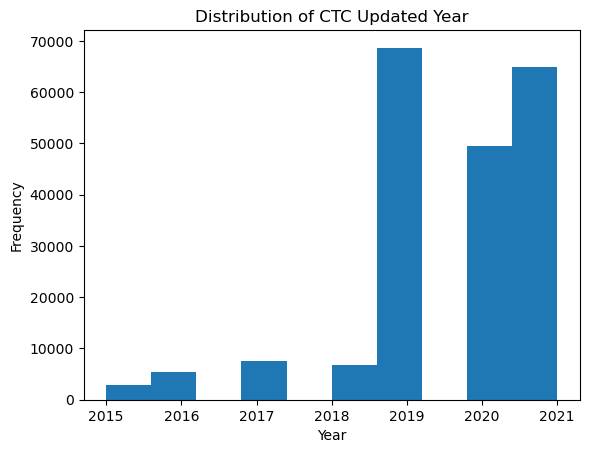

In [209]:
plt.figure()
plt.hist(df['ctc_updated_year'], bins=10)
plt.title('Distribution of CTC Updated Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [210]:
# feature engineering 
current_year = 2025
df['experience'] = current_year - df['orgyear']

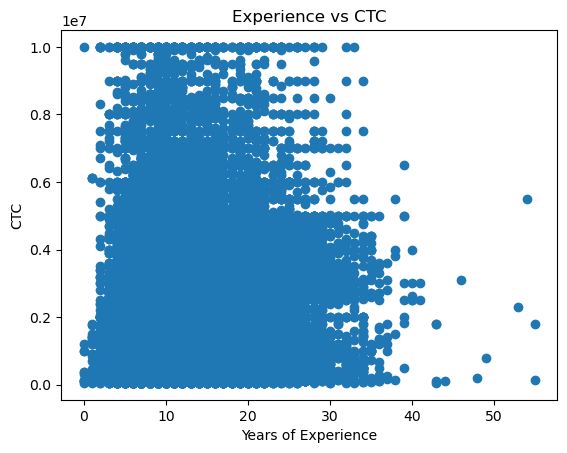

In [211]:
# Bivariate analysis
# Exp
plt.figure()
plt.scatter(df['experience'], df['ctc'])
plt.xlabel('Years of Experience')
plt.ylabel('CTC')
plt.title('Experience vs CTC')
plt.show()

CTC generally increases with experience, though the relationship shows high variance, indicating that factors such as job role and company also influence compensation.

<Figure size 640x480 with 0 Axes>

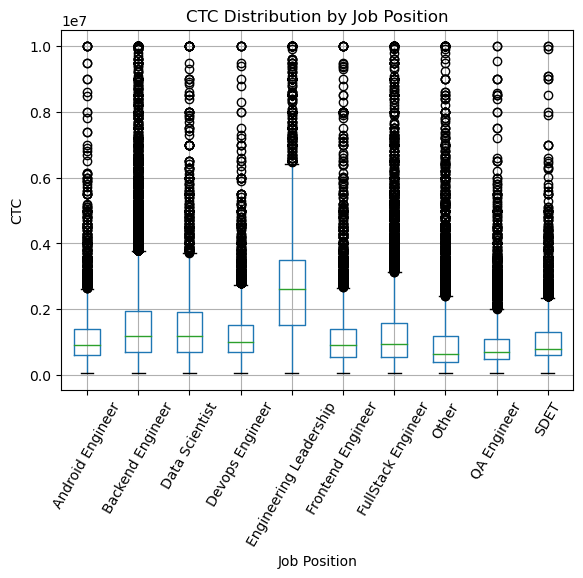

In [212]:
# Job Position vs CTC

top_roles = df['job_position'].value_counts().head(10).index

plt.figure()
df[df['job_position'].isin(top_roles)].boxplot(column = 'ctc', by = 'job_position', rot = 60)
plt.title('CTC Distribution by Job Position')
plt.suptitle('')
plt.xlabel('Job Position')
plt.ylabel('CTC')
plt.show()

Different job positions exhibit distinct salary distributions, highlighting the importance of role-based segmentation in clustering.

<Figure size 640x480 with 0 Axes>

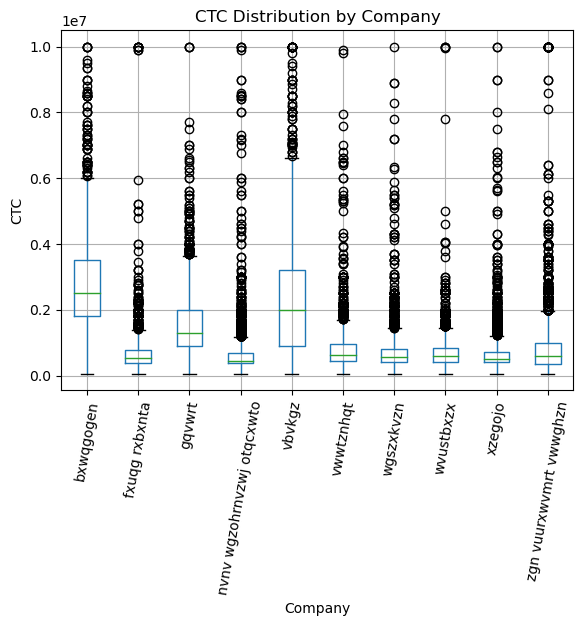

In [213]:
# Company vs CTC
top_companies = df['company_hash'].value_counts().head(10).index

plt.figure()
df[df['company_hash'].isin(top_companies)].boxplot(column = 'ctc', by = 'company_hash', rot = 80)
plt.title('CTC Distribution by Company')
plt.suptitle('')
plt.xlabel('Company')
plt.ylabel('CTC')
plt.show()

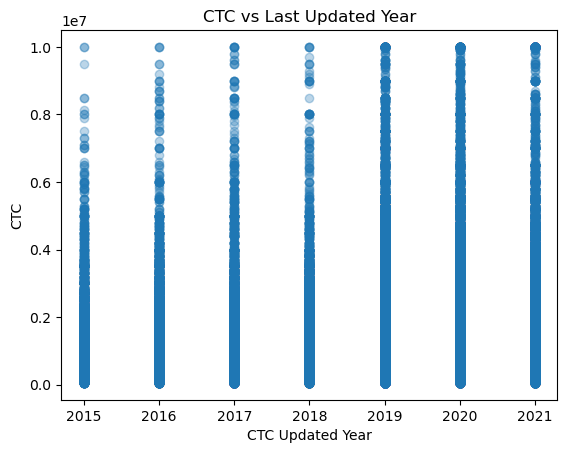

In [214]:
plt.figure()
plt.scatter(df['ctc_updated_year'], df['ctc'], alpha = 0.3)
plt.xlabel('CTC Updated Year')
plt.ylabel('CTC')
plt.title('CTC vs Last Updated Year')
plt.show()

Learners with more recent CTC updates tend to have higher compensation, indicating recent career growth.

<Figure size 640x480 with 0 Axes>

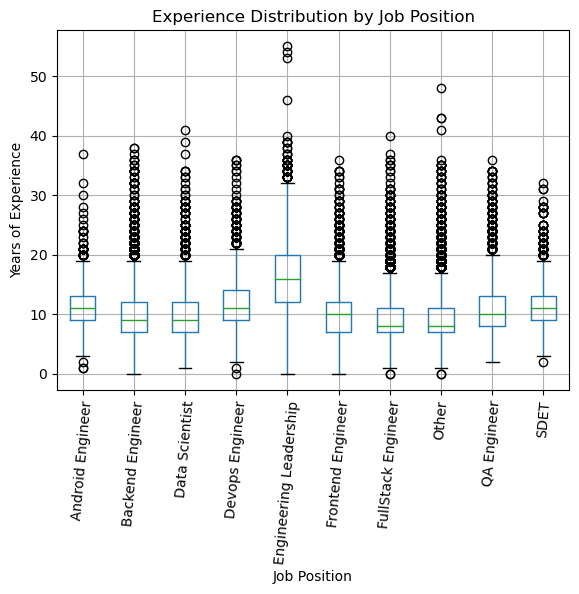

In [215]:
plt.figure()
df[df['job_position'].isin(top_roles)].boxplot(column = 'experience', by = 'job_position', rot = 85)
plt.title('Experience Distribution by Job Position')
plt.suptitle('')
plt.xlabel('Job Position')
plt.ylabel('Years of Experience')
plt.show()

Certain job roles are associated with higher experience levels, reflecting seniority and career progression patterns.


# Data Preprocessing

In [216]:
# null values
df.isna().sum()

company_hash           44
email_hash              0
orgyear               160
ctc                  4660
job_position        52562
ctc_updated_year        0
ctc_log              4660
experience            160
dtype: int64

In [217]:
# company hash
df['company_hash'].fillna(df['company_hash'].mode()[0], inplace = True)

In [218]:
# job position
df['job_position'].fillna('Unkonwn', inplace = True)

In [219]:
# numerical columns
num_cols = ['orgyear', 'ctc']

In [220]:
# using knn imputer for numerical columns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

scaler = StandardScaler()
scaled_num = scaler.fit_transform(df[num_cols])

In [221]:
knn_imputer = KNNImputer(n_neighbors = 5)
imputed_scaled_num = knn_imputer.fit_transform(scaled_num)

In [222]:
imputed_num = scaler.inverse_transform(imputed_scaled_num)
df[num_cols] = imputed_num

In [223]:
# recomputing derived features
current_year = 2025
df['experience'] = current_year - df['orgyear']
df['ctc_log'] = np.log1p(df['ctc'])

In [224]:
df.isna().sum()

company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
ctc_log             0
experience          0
dtype: int64

Missing values were handled using a combination of strategies based on feature type and importance.
Categorical features were imputed using mode or an explicit 'Unknown' category.
Numerical base features were imputed using KNN imputation after scaling to preserve relationships.
Derived features were recomputed after imputation to ensure consistency.


In [225]:
#Regex for cleaning company names

import re
df['company_clean'] = df['company_hash'].astype(str).apply(
    lambda x: re.sub('[^A-Za-z0-9 ]+', '', x).strip()
)

In [226]:
df["company_clean"] = df["company_clean"].str.lower()

In [168]:
df.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'ctc_log', 'experience', 'company_clean'],
      dtype='object')

In [227]:
#Standardization & Encoding

#frequency encoding 
company_freq = df['company_clean'].value_counts(normalize = True)
df['company_encoded'] = df['company_clean'].map(company_freq)

In [228]:
job_freq = df["job_position"].value_counts(normalize = True)

df["job_encoded"] = df["job_position"].map(job_freq)

In [229]:
df[['company_clean', 'company_encoded', 'job_position', 'job_encoded']].head()

,company_clean,company_encoded,job_position,job_encoded
0,atrgxnnt xzaxv,0.000044,Other,0.087790
1,qtrxvzwt xzegwgbb rxbxnta,0.002084,FullStack Engineer,0.120077
2,ojzwnvwnxw vx,0.000005,Backend Engineer,0.211588
3,ngpgutaxv,0.000340,Backend Engineer,0.211588
4,qxen sqghu,0.000029,FullStack Engineer,0.120077


Categorical variables were encoded using frequency encoding to avoid high dimensionality.
This approach represents each category based on its relative occurrence in the dataset, making it suitable for clustering.


In [231]:
features = [
    'experience',
    'ctc_log',
    'ctc_updated_year',
    'company_encoded',
    'job_encoded'
]

In [233]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(df[features])

In [235]:
X_scaled = pd.DataFrame(X_scaled, columns = features)
X_scaled.head()

,experience,ctc_log,ctc_updated_year,company_encoded,job_encoded
0,-0.208612,0.186711,0.280559,-0.496983,-0.550113
1,-0.681022,-0.887158,-0.474101,-0.280168,-0.211960
2,0.027594,0.904976,0.280559,-0.501113,0.746478
3,-0.444817,-0.356321,-0.474101,-0.465494,0.746478
4,-0.444817,0.476453,-0.474101,-0.498532,-0.211960


All features were standardized using z-score normalization to ensure equal contribution during distance-based clustering.


In [236]:
X_scaled.describe()

,experience,ctc_log,ctc_updated_year,company_encoded,job_encoded
count,2.058430e+05,2.058430e+05,2.058430e+05,2.058430e+05,2.058430e+05
mean,1.133593e-16,-7.515406e-16,3.720920e-14,-1.239220e-16,4.611695e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.334459e+00,-3.526967e+00,-3.492739e+00,-5.011133e-01,-1.469526e+00
25%,-6.810223e-01,-6.460621e-01,-4.741008e-01,-4.985321e-01,-1.120027e+00
50%,-2.086117e-01,4.792977e-02,2.805589e-01,-4.562015e-01,-2.119601e-01
75%,5.000042e-01,6.592011e-01,1.035219e+00,-8.864794e-02,1.204811e+00
max,1.065683e+01,2.838618e+00,1.035219e+00,3.824869e+00,1.204811e+00


In [241]:
df["job_position"].value_counts().head(50)

Unkonwn                               52562
Backend Engineer                      43554
FullStack Engineer                    24717
Other                                 18071
Frontend Engineer                     10417
Engineering Leadership                 6870
QA Engineer                            6587
Data Scientist                         5368
Android Engineer                       5357
SDET                                   4967
Devops Engineer                        4612
Support Engineer                       3603
Data Analyst                           2906
iOS Engineer                           2746
Engineering Intern                     2692
Product Designer                       1314
Backend Architect                      1287
Fullstack Engineer                     1265
Research Engineers                     1228
Product Manager                        1161
Program Manager                         814
Non Coder                               595
Database Administrator          

In [242]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,ctc_log,experience,company_clean,company_encoded,job_encoded
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000.0,Other,2020.0,13.910822,9.0,atrgxnnt xzaxv,0.000044,0.087790
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999.0,FullStack Engineer,2019.0,13.017003,7.0,qtrxvzwt xzegwgbb rxbxnta,0.002084,0.120077
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000.0,Backend Engineer,2020.0,14.508658,10.0,ojzwnvwnxw vx,0.000005,0.211588
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000.0,Backend Engineer,2019.0,13.458837,8.0,ngpgutaxv,0.000340,0.211588
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000.0,FullStack Engineer,2019.0,14.151984,8.0,qxen sqghu,0.000029,0.120077


In [258]:
# Manual Clustering
#Creating Designation Flag & Insights
def job_role_mapping(title):
    if pd.isna(title):
        return "Unknown"

    title = title.lower()

    if "backend" in title or "software" in title or "sde" in title or "developer" in title:
        return "Backend / Software Engineer"

    if "frontend" in title or "ui" in title:
        return "Frontend Engineer"

    if "fullstack" in title or "full stack" in title:
        return "Full Stack Engineer"

    if "android" in title or "ios" in title:
        return "Mobile Engineer"

    if "data scientist" in title or "data analyst" in title or "data engineer" in title:
        return "Data Role"

    if "qa" in title or "sdet" in title:
        return "QA / Testing"

    if "devops" in title or "system" in title or "infra" in title or "release" in title:
        return "DevOps / Infra"

    if "manager" in title or "leadership" in title or "lead" in title or "founder" in title:
        return "Leadership / Management"

    if "designer" in title:
        return "Design"

    if "intern" in title or "student" in title:
        return "Intern / Student"

    if "support" in title or "consultant" in title or "associate" in title or "non coder" in title:
        return "Non Technical"

    return "Other"


In [260]:
df["job_cluster"] = df["job_position"].apply(job_role_mapping)

In [264]:
df["job_cluster"].value_counts()

Other                          73087
Backend / Software Engineer    50569
Full Stack Engineer            25991
Frontend Engineer              10426
Leadership / Management         9482
Data Role                       8303
Mobile Engineer                 8108
QA / Testing                    6592
DevOps / Infra                  4845
Non Technical                   4348
Intern / Student                2775
Design                          1317
Name: job_cluster, dtype: int64

Backend / Software Engineer dominates the learner base

In [272]:
#Creating Class Flag & Insights
# Class flag --> at what career stage/level is the learner.

def class_flag(row):
    title = str(row["job_position"]).lower()
    exp = row["experience"]
    
    if "intern" in title or exp <= 1:
        return "Entry"
    
    if "manager" in title or "lead" in title or "director" in title:
        return "Leadership"
    
    if 2 <= exp <= 5:
        return "Mid"
    
    if exp > 5:
        return "Senior"
    
    return "Unknown"

In [277]:
df["class_flag"] = df.apply(class_flag, axis = 1)

In [278]:
df["class_flag"].value_counts()

Senior        176465
Mid            17406
Leadership      9135
Entry           2837
Name: class_flag, dtype: int64

The majority of learners fall under the Senior category, indicating that Scaler primarily attracts experienced professionals seeking career transitions or upskilling. Mid-level and Leadership learners form smaller but meaningful segments, while Entry-level users are minimal, reinforcing Scaler’s positioning as a platform for working professionals rather than beginners.

In [292]:
#Creating Tier Flag & Insights
# finding out the median ctc company wise
company_stats = df.groupby("company_hash").agg(median_ctc = ("ctc", "median")).reset_index()


# defining rules for tiers
tier_1 = company_stats["median_ctc"].quantile(0.80)
tier_2 = company_stats["median_ctc"].quantile(0.50)

In [294]:
def tier(row):
    if row["median_ctc"] >= tier_1:
        return "Tier-1"
    elif row["median_ctc"] >= tier_2:
        return "Tier-2"
    else:
        return "Tier-3"

In [296]:
company_stats["tier_flag"] = company_stats.apply(tier, axis = 1)

In [302]:
df = df.merge(company_stats[["company_hash", "tier_flag"]], on = "company_hash", how = "left")

In [304]:
#validation for tier flag
df["tier_flag"].value_counts()

Tier-3    86779
Tier-2    72053
Tier-1    47011
Name: tier_flag, dtype: int64

Since company names were anonymized, Tier Flags were inferred using company-level compensation statistics. Median CTC served as a strong proxy for company quality, enabling meaningful segmentation despite data anonymization.

Due to anonymized company identifiers, company tiers were inferred using compensation-based proxies. Companies with higher median CTCs were classified as Tier-1, reflecting stronger brand and compensation structures, while lower median CTC companies were categorized as Tier-3. This proxy-based approach enabled meaningful company segmentation despite anonymized data.

In [309]:
# Unsupervised learning
# Checking clustering tendency, Elbow method & K- means clustering

from sklearn.neighbors import NearestNeighbors
import numpy as np

def hopkins_statistic(X):
    d = X.shape[1]
    n = X.shape[0]
    m = int(0.1 * n)

    nbrs = NearestNeighbors(n_neighbors=1).fit(X)

    rand_X = np.random.uniform(
        np.min(X, axis=0),
        np.max(X, axis=0),
        (m, d)
    )

    u_dist, _ = nbrs.kneighbors(rand_X)
    w_dist, _ = nbrs.kneighbors(X.iloc[np.random.choice(n, m, replace=False)])

    H = np.sum(u_dist) / (np.sum(u_dist) + np.sum(w_dist))
    return H

In [310]:
hopkins_statistic(X_scaled)

/Users/prayas/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


1.0

Value close to 1 → good clustering tendency

Value around 0.5 → random

Value close to 0 → uniform

Hopkins statistic indicated strong clustering tendency, justifying the application of unsupervised clustering algorithms.

/Users/prayas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/prayas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/prayas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/prayas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/prayas/an

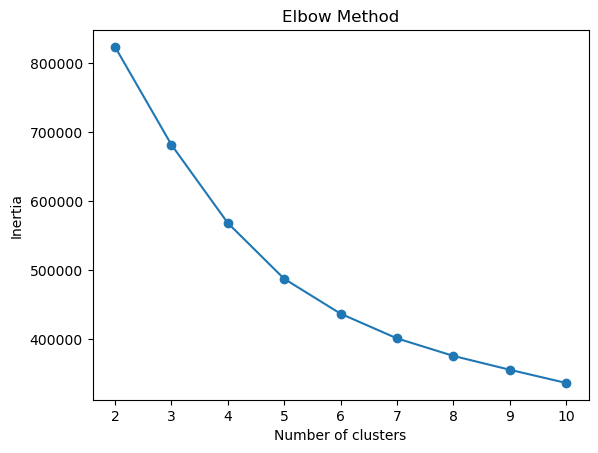

In [318]:
# Elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
plt.plot(K, inertia, marker = 'o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

The elbow point was observed at K = 4 and 5, indicating an optimal balance between cluster compactness and complexity.

In [320]:
# K-means
kmeans = KMeans(n_clusters = 4 , random_state = 42)
df["kmeans_cluster"] = kmeans.fit_predict(X_scaled)

/Users/prayas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [324]:
df.groupby("kmeans_cluster")[features].mean()

,experience,ctc_log,ctc_updated_year,company_encoded,job_encoded
kmeans_cluster,,,,,
0,8.427599,13.765487,2020.083858,0.003015,0.235210
1,7.894458,13.158264,2020.058667,0.034779,0.158526
2,8.615637,13.478385,2019.821362,0.002335,0.059659
3,15.135549,14.393094,2018.387179,0.002107,0.107573


Cluster --> Persona<br>
0 --> Well-paid mid–senior professionals<br>
1 --> Underpaid mid-level professionals<br>
2 --> Stable but stagnant mid-level<br>
3 --> Senior / leadership tier

In [328]:
kmeans = KMeans(n_clusters = 5 , random_state = 42)
df["kmeans_cluster"] = kmeans.fit_predict(X_scaled)

/Users/prayas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [329]:
df.groupby("kmeans_cluster")[features].mean()

,experience,ctc_log,ctc_updated_year,company_encoded,job_encoded
kmeans_cluster,,,,,
0,8.313461,13.768116,2020.126476,0.003004,0.235910
1,7.818651,13.158259,2020.103204,0.034909,0.158789
2,8.481594,13.513293,2019.876401,0.002336,0.058944
3,16.551851,14.589152,2019.492680,0.002038,0.092037
4,11.366323,13.629453,2016.567987,0.002729,0.149457


Cluster --> Persona<br>
0 --> Mid–Senior, High Pay<br>
1 --> Mid-Level, Underpaid<br>
2 --> Mid-Level, Stable<br>
3 --> Very Senior, Top Earners<br>
4 --> Senior, Salary-Stagnant

In [326]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram

sample_X = X_scaled.iloc[np.random.choice(X_scaled.shape[0], 3000, replace = False)]
linked = linkage(sample_X , method = "ward")

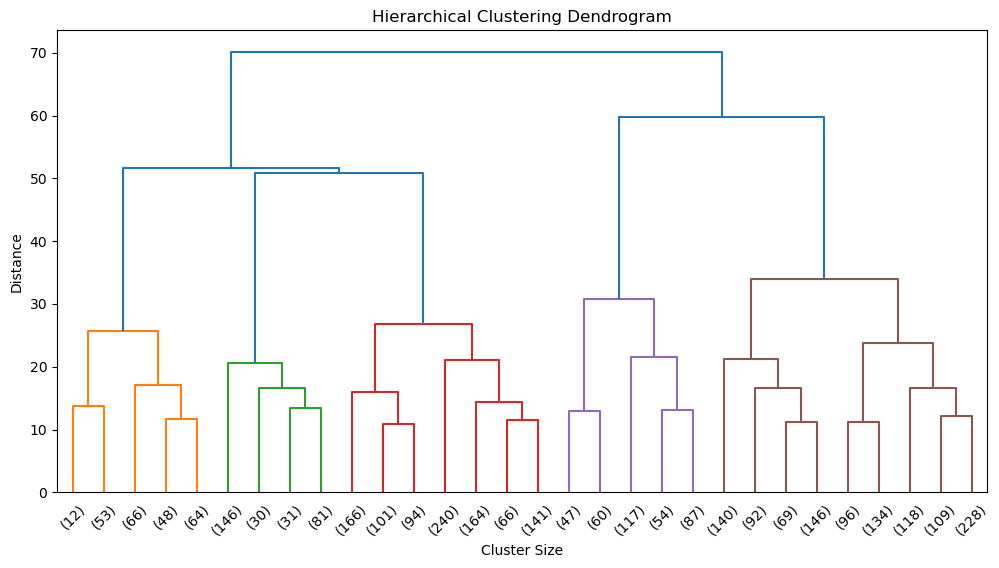

In [327]:
plt.figure(figsize = (12,6))
dendrogram(linked, truncate_mode = "lastp", p = 30)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

Dendrogram visualization supported the KMeans cluster count (k = 5), indicating natural separations in learner profiles.

In [331]:
df.sample(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,ctc_log,experience,company_clean,company_encoded,job_encoded,job_cluster,class_flag,tier_flag,kmeans_cluster
151424,stztqvr bgngqo,0e2d314dc7bd001c4fb7aa416177994a0b6b3983af33e1...,2007.0,1300000.0,Data Scientist,2019.0,14.077876,18.0,stztqvr bgngqo,0.000063,0.026078,Data Role,Senior,Tier-2,3
118260,vwwtznhqt,8d124e7181d37bb77d1f549e27c4da431b85af5e3f94c4...,2019.0,450000.0,QA Engineer,2021.0,13.017005,6.0,vwwtznhqt,0.013943,0.032000,QA / Testing,Senior,Tier-3,2
75015,aqtvb d,8b1b9740c25048f4bfb46f02906a1f79b03545c34b7262...,2018.0,2350000.0,FullStack Engineer,2021.0,14.669926,7.0,aqtvb d,0.000005,0.120077,Full Stack Engineer,Senior,Tier-1,2
45967,ojontbo ntwyzgrgsj sqghu,9a07b04246705cbb26f0499befc2ef11ac1ee26751f199...,2018.0,6000000.0,FullStack Engineer,2020.0,15.607270,7.0,ojontbo ntwyzgrgsj sqghu,0.000010,0.120077,Full Stack Engineer,Senior,Tier-1,0
71593,hmtq,f6fb54562047b4ecde6a6f247e8047474e84b7db65802b...,2013.0,190000.0,iOS Engineer,2018.0,12.154785,12.0,hmtq,0.000976,0.013340,Mobile Engineer,Senior,Tier-1,2
57438,bgqsvz onvzrtj,0125d48f72f10d672d023201fadb529ee732b2a6843121...,2014.0,1600000.0,Unkonwn,2020.0,14.285515,11.0,bgqsvz onvzrtj,0.002750,0.255350,Other,Senior,Tier-1,0
204568,wgytoxnj,2a3d04e3c726a68a1120f32759eccb27d9fae2b4f5241a...,2016.0,3500000.0,Unkonwn,2019.0,15.068274,9.0,wgytoxnj,0.000238,0.255350,Other,Senior,Tier-1,0
86121,pgzztwnoyxen,f1a2cf71756db11180ab4ffbd847ba9d83fa7f26ab0024...,2018.0,600000.0,Frontend Engineer,2020.0,13.304687,7.0,pgzztwnoyxen,0.000019,0.050607,Frontend Engineer,Senior,Tier-2,2
99569,ovbohzs qa xzonxnhnt xzaxv atryx,292a4e8aabe5367d4210c75d126155738adbbf18b3c55b...,2019.0,3400000.0,Backend Engineer,2020.0,15.039286,6.0,ovbohzs qa xzonxnhnt xzaxv atryx,0.001355,0.211588,Backend / Software Engineer,Senior,Tier-2,0
186761,nvnv wgzohrnvzwj otqcxwto,6aefe5681fda5bd12c1f0f2c6c1c6c2d4ad712f6ecc889...,2019.0,336000.0,Unkonwn,2019.0,12.724869,6.0,nvnv wgzohrnvzwj otqcxwto,0.040715,0.255350,Other,Senior,Tier-3,1


# Actionable Insights & Recommendations
1. Senior professionals form the largest cluster

Insight:
Most learners fall into senior-level roles with higher experience and compensation. These learners are likely looking for:

    Leadership growth

    Architectural thinking

    Strategic career transitions

Recommendation:
Scaler can design:

    Advanced system design tracks

    Leadership-oriented mentorship sessions

    Career coaching focused on senior and principal roles

2. Mid-level professionals are a strong upskilling segment

Insight:
A significant group consists of mid-level engineers with moderate experience and compensation. This group is actively trying to grow faster in their careers.

Recommendation:

    Focus marketing on career acceleration

    Provide structured learning paths to move from mid -> senior roles

    Highlight success stories of similar learners who transitioned successfully

3. Entry-level learners are fewer but high-potential

Insight:
Entry-level learners form a smaller cluster but show high learning intent. Many are interns or early professionals trying to break into strong tech roles.

Recommendation:

    Offer beginner-friendly foundational programs

    Provide strong mentorship and placement support

    Create confidence-building milestones early in the program

4. Learners from Tier-1 companies show distinct behavior

Insight:
Learners working in Tier-1 companies typically have:

    Higher CTC

    Stronger technical roles

    Clear specialization

Recommendation:

    Offer advanced electives and niche specializations

    Position Scaler as a platform for elite career growth, not just entry-level upskilling

    Use these learners for peer learning and community leadership

5. Tier-2 and Tier-3 company learners seek career mobility

Insight:
Learners from Tier-2 and Tier-3 companies are more focused on:

    Improving compensation

    Moving into better-known companies

    Strengthening core engineering skills

Recommendation:

    Emphasize placement outcomes and salary growth

    Highlight company-switch success metrics

    Provide resume, interview, and system design support

6. Role-based clustering reveals learning preferences

Insight:
Backend, Full-Stack, Data, and QA roles show different clustering behavior, indicating varied learning needs.

Recommendation:

    Personalize course recommendations by role cluster

    Create role-specific learning tracks

    Avoid one-size-fits-all curriculum design

7. Clustering enables targeted learner engagement

Insight:
Different learner clusters respond to different motivations:
Some care about salary growth, others about role transition or leadership.

Recommendation:

    Use cluster-based segmentation for communication

    Customize messaging, mentorship, and career guidance

    Improve learner satisfaction and retention through personalization